### Problem Statement

    Identify products at risk of backorder before the event occurs so that business has time to react.

### What is a Backorder?
    Backorders are products that are temporarily out of stock, but a customer is permitted to place an order against future inventory. A backorder generally indicates that customer demand for a product or service exceeds a company’s capacity to supply it. Back orders are both good and bad. Strong demand can drive back orders, but so can suboptimal planning.

### Data

Data file contains the historical data for the 8 weeks prior to the week we are trying to predict. The data was taken as weekly snapshots at the start of each week. Columns are defined as follows:

    sku - Random ID for the product

    national_inv - Current inventory level for the part

    lead_time - Transit time for product (if available)

    in_transit_qty - Amount of product in transit from source

    forecast_3_month - Forecast sales for the next 3 months

    forecast_6_month - Forecast sales for the next 6 months

    forecast_9_month - Forecast sales for the next 9 months

    sales_1_month - Sales quantity for the prior 1 month time period

    sales_3_month - Sales quantity for the prior 3 month time period

    sales_6_month - Sales quantity for the prior 6 month time period

    sales_9_month - Sales quantity for the prior 9 month time period

    min_bank - Minimum recommend amount to stock

    potential_issue - Source issue for part identified

    pieces_past_due - Parts overdue from source

    perf_6_month_avg - Source performance for prior 6 month period

    perf_12_month_avg - Source performance for prior 12 month period

    local_bo_qty - Amount of stock orders overdue

    deck_risk - Part risk flag

    oe_constraint - Part risk flag

    ppap_risk - Part risk flag

    stop_auto_buy - Part risk flag

    rev_stop - Part risk flag

    went_on_backorder - Product actually went on backorder. This is the target value.

#### Identify Right Error Metrics

    Based on the business, identify right error metrics.

### Data Pre-processing
#### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import os

Get current working directory

In [2]:
PATH = os.getcwd()

Change directory

In [3]:
os.chdir(PATH)

#### Loading the data

In [4]:
#Load the Data - Backorders.csv
data = pd.read_csv('BackOrders.csv', na_values=[-99])
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,NaN,NaN,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


#### Understand the Data

See the number row and columns

In [5]:
data.shape

(61589, 23)

Display the columns

In [6]:
print(data.columns)
print(data.dtypes)

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')
sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
pp

See the top rows of the data

In [7]:
data.head(10)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,NaN,NaN,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No
5,3002608,297,12.0,0,0,0,0,5,6,44,...,0,0.58,0.75,0,Yes,No,No,Yes,No,No
6,1707693,3285,8.0,0,0,0,0,18,81,162,...,0,0.61,0.57,0,No,No,No,Yes,No,No
7,2066128,6,2.0,0,0,3,9,1,5,8,...,0,0.86,0.77,0,No,No,No,Yes,No,Yes
8,3174990,99,8.0,0,46,169,225,2,22,176,...,0,0.11,0.37,0,No,No,No,Yes,No,No
9,3021709,52,2.0,0,0,0,0,0,0,0,...,0,0.83,0.69,0,No,No,No,Yes,No,No


Shows a quick statistic summary of your data using describe.

    For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. 

        The top is the most common value.

        The freq is the most common value’s frequency.

In [8]:
data.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,...,61589.000000,57248.000000,57498.000000,61589.000000,61589,61589,61589,61589,61589,61589
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48145,61577,53792,59303,61569,50296
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,...,1.605400,0.767787,0.763014,1.205361,NaN,NaN,NaN,NaN,NaN,NaN
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,...,42.309229,0.251166,0.243469,29.981155,NaN,NaN,NaN,NaN,NaN,NaN
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.680000,0.680000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,...,0.000000,0.840000,0.820000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,...,0.000000,0.970000,0.950000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Display data type of each variable

In [9]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

#### Observations

    sku is Categorical but is interpreted as int64 

    potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder are categorical but are interpreted as object. 

#### Convert all the attributes to appropriate type

Data type conversion

    Using astype('category') to convert potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder attributes to categorical attributes.


In [10]:
data[['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']]=\
data[['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']].astype('category')
#potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder

Display data type of each variable

In [11]:
data.dtypes

sku                     int64
national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

##### Delete sku attribute

In [12]:
data.drop('sku', axis=1,inplace=True)

In [13]:
data.dtypes

national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

#### Missing Data

    Missing value analysis and dropping the records with missing values

Observing the number of records before and after missing value records removal

In [14]:
print('Before removing NA values:')
data.isna().sum()

Before removing NA values:


national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg     4341
perf_12_month_avg    4091
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

Since the number of missing values is about 5%. For initial analysis we ignore all these records

In [15]:
data.dropna(inplace=True)
print('After removing NA values:')
data.isna().sum()

After removing NA values:


national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

#### Converting Categorical to Numeric

For some of the models all the independent attribute should be of type numeric and ANN model is one among them.
But this data set has some categorial attributes.

'pandas.get_dummies' To convert convert categorical variable into dummy/indicator variables


##### Creating dummy variables.

If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category


In [16]:
data = pd.get_dummies(data, columns=['potential_issue','deck_risk','oe_constraint','ppap_risk',
                                     'stop_auto_buy','rev_stop','went_on_backorder'], drop_first=True)
print(data.dtypes)
data.head()

national_inv               int64
lead_time                float64
in_transit_qty             int64
forecast_3_month           int64
forecast_6_month           int64
forecast_9_month           int64
sales_1_month              int64
sales_3_month              int64
sales_6_month              int64
sales_9_month              int64
min_bank                   int64
pieces_past_due            int64
perf_6_month_avg         float64
perf_12_month_avg        float64
local_bo_qty               int64
potential_issue_Yes        uint8
deck_risk_Yes              uint8
oe_constraint_Yes          uint8
ppap_risk_Yes              uint8
stop_auto_buy_Yes          uint8
rev_stop_Yes               uint8
went_on_backorder_Yes      uint8
dtype: object


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
1,7,2.0,0,0,0,0,0,0,0,0,...,0.50,0.28,0,0,1,0,0,1,0,0
2,258,15.0,10,10,77,184,46,132,256,365,...,0.54,0.70,0,0,0,0,0,1,0,0
3,46,2.0,0,0,0,0,1,2,6,9,...,0.75,0.90,0,0,1,0,0,1,0,0
4,2,2.0,0,4,6,10,2,2,5,6,...,0.97,0.92,0,0,0,0,0,1,0,0
5,297,12.0,0,0,0,0,5,6,44,57,...,0.58,0.75,0,0,1,0,0,1,0,0


#### Target attribute distribution

In [17]:
data.went_on_backorder_Yes.value_counts()*100/data.went_on_backorder_Yes.count()

0    81.024665
1    18.975335
Name: went_on_backorder_Yes, dtype: float64

#### Train-Test Split

Using sklearn.model_selection.train_test_split

    Split arrays or matrices into train and test subsets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(['went_on_backorder_Yes'])],
                                                   data['went_on_backorder_Yes'], test_size=0.3,
                                                   random_state=123, stratify = data['went_on_backorder_Yes'],
                                                   shuffle=True)

### Perceptron Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
perceptron_model = Sequential()

perceptron_model.add(Dense(1, input_dim=21, activation='sigmoid', kernel_initializer='normal'))

In [21]:
perceptron_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Note:
# For multi-class classification use loss = 'categorical_crossentropy' and metrics = 'categorical_accuracy'
# Even if you use "binary_crossentropy" as loss, use metrics = 'categorical_accuracy' for multi-class

# Why? Because:
# Keras does not define a single accuracy metric, but several different ones, among them binary_accuracy and 
# categorical_accuracy. What happens under the hood is that, since you have selected binary cross entropy as
# your loss function and have not specified a particular accuracy metric, Keras (wrongly...) infers that you
# are interested in the binary_accuracy, and this is what it returns - while in fact you are interested in 
# the categorical_accuracy.

In [22]:
perceptron_model_history = perceptron_model.fit(X_train, y_train, epochs=10, batch_size=64,
                                               validation_split=0.2,use_multiprocessing=True) #shuffle=True

Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 21us/step - loss: 365.6635 - accuracy: 0.8148 - val_loss: 207.4635 - val_accuracy: 0.7935
Epoch 2/10
32058/32058 [==============================] - 1s 18us/step - loss: 5589.9967 - accuracy: 0.7825 - val_loss: 716.5624 - val_accuracy: 0.7870
Epoch 3/10
32058/32058 [==============================] - 1s 18us/step - loss: 1739.1568 - accuracy: 0.7991 - val_loss: 224.1718 - val_accuracy: 0.8383
Epoch 4/10
32058/32058 [==============================] - 1s 31us/step - loss: 3913.1412 - accuracy: 0.7980 - val_loss: 3882.6776 - val_accuracy: 0.7694
Epoch 5/10
32058/32058 [==============================] - 1s 26us/step - loss: 2130.3706 - accuracy: 0.8020 - val_loss: 439.9466 - val_accuracy: 0.8031
Epoch 6/10
32058/32058 [==============================] - 1s 24us/step - loss: 1726.6585 - accuracy: 0.8040 - val_loss: 291.5638 - val_accuracy: 0.8362
Epoch 7/10
32058/32058 [===============

##### Plot

In [23]:
print(perceptron_model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [24]:
import matplotlib.pyplot as plt

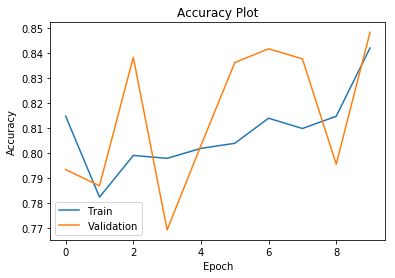

In [25]:
plt.plot(perceptron_model_history.history['accuracy'])
plt.plot(perceptron_model_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

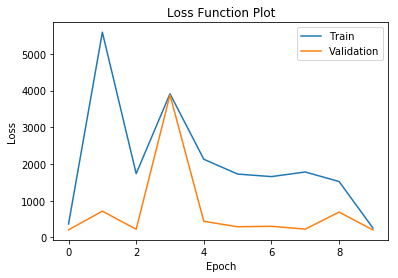

In [26]:
plt.plot(perceptron_model_history.history['loss'])
plt.plot(perceptron_model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [27]:
# Get Model Summary:

print(perceptron_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 22        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


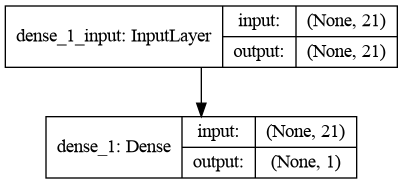

In [28]:
# Vizualize the model:

from keras.utils.vis_utils import plot_model

plot_model(perceptron_model, to_file='perceptron_model.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'

##### Predictions

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
test_pred = perceptron_model.predict_classes(X_test)
train_pred = perceptron_model.predict_classes(X_train)

confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[28967  3502]
 [ 2540  5064]]
[[12445  1471]
 [ 1072  2187]]


##### Train Test Accuracy, True Negative Rate and True Positive Rate

In [31]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

print("-----------------------")

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.8921432751239644
Train TPR:  0.6659652814308259
Train Accuracy:  0.8492251640755621
-----------------------
Test TNR:  0.8942943374532911
Test TPR:  0.6710647437864375
Test Accuracy:  0.8519359534206695


### MLP with 2 layers

    1 hidden layer with 15 neurons

Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 29us/step - loss: 0.3286 - accuracy: 0.8453 - val_loss: 0.3067 - val_accuracy: 0.8692
Epoch 2/10
32058/32058 [==============================] - 1s 26us/step - loss: 0.3048 - accuracy: 0.8586 - val_loss: 0.3157 - val_accuracy: 0.8143
Epoch 3/10
32058/32058 [==============================] - 1s 24us/step - loss: 0.2914 - accuracy: 0.8704 - val_loss: 0.2706 - val_accuracy: 0.8937
Epoch 4/10
32058/32058 [==============================] - 1s 24us/step - loss: 0.3036 - accuracy: 0.8719 - val_loss: 0.2932 - val_accuracy: 0.8883
Epoch 5/10
32058/32058 [==============================] - 1s 23us/step - loss: 0.2827 - accuracy: 0.8814 - val_loss: 0.2697 - val_accuracy: 0.8882
Epoch 6/10
32058/32058 [==============================] - 1s 22us/step - loss: 0.2863 - accuracy: 0.8737 - val_loss: 0.2857 - val_accuracy: 0.8719
Epoch 7/10
32058/32058 [==============================] - 1s 23us/ste

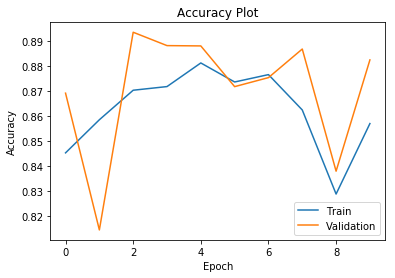

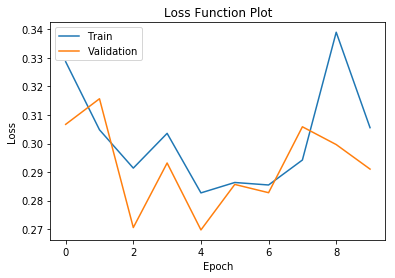

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________
None


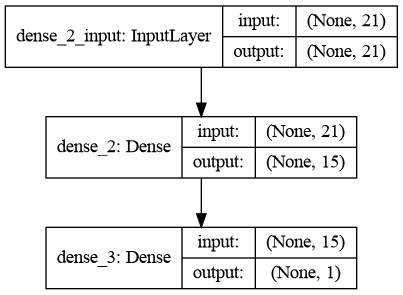

In [32]:
## MLP with 2 layers and 15 neurons:

# Define MLP model:

from keras import initializers

mlp_model_15 = Sequential()

mlp_model_15.add(Dense(15, input_dim=21, activation='tanh', kernel_initializer=initializers.RandomUniform(seed=123)))
mlp_model_15.add(Dense(1, activation='sigmoid'))
mlp_model_15.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


mlp_model_15_history = mlp_model_15.fit(X_train, y_train, epochs=10, batch_size=64,
                                        validation_split=0.2,use_multiprocessing=True)

## Plot:
print(mlp_model_15_history.history.keys())

## Accuracy:
plt.plot(mlp_model_15_history.history['accuracy'])
plt.plot(mlp_model_15_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Loss:
plt.plot(mlp_model_15_history.history['loss'])
plt.plot(mlp_model_15_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Get Model Summary:
print(mlp_model_15.summary())

# Vizualize the model:
from keras.utils.vis_utils import plot_model

plot_model(mlp_model_15, to_file='mlp_model_15.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'


#### Predictions

#### Getting evaluation metrics and evaluating model performance

#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [33]:
#### Predictions

#### Getting evaluation metrics and evaluating model performance

mlp_test_pred_15 = mlp_model_15.predict_classes(X_test)
mlp_train_pred_15 = mlp_model_15.predict_classes(X_train)

mlp_confusion_matrix_test_15 = confusion_matrix(y_test, mlp_test_pred_15)
mlp_confusion_matrix_train_15 = confusion_matrix(y_train, mlp_train_pred_15)

print(mlp_confusion_matrix_train_15)
print(mlp_confusion_matrix_test_15)


#### Calculate Accuracy, True Positive Rate and True Negative Rates

##### Train Test Accuracy, True Negative Rate and True Positive Rate

mlp_Accuracy_Train_15=(mlp_confusion_matrix_train_15[0,0]+mlp_confusion_matrix_train_15[1,1])/(mlp_confusion_matrix_train_15[0,0]+mlp_confusion_matrix_train_15[0,1]+mlp_confusion_matrix_train_15[1,0]+mlp_confusion_matrix_train_15[1,1])
mlp_TNR_Train_15=mlp_confusion_matrix_train_15[0,0]/(mlp_confusion_matrix_train_15[0,0]+mlp_confusion_matrix_train_15[0,1])
mlp_TPR_Train_15=mlp_confusion_matrix_train_15[1,1]/(mlp_confusion_matrix_train_15[1,0]+mlp_confusion_matrix_train_15[1,1])

print("Train TNR: ",mlp_TNR_Train_15)
print("Train TPR: ",mlp_TPR_Train_15)
print("Train Accuracy: ",mlp_Accuracy_Train_15)

print("-----------------------")

mlp_Accuracy_Test_15=(mlp_confusion_matrix_test_15[0,0]+mlp_confusion_matrix_test_15[1,1])/(mlp_confusion_matrix_test_15[0,0]+mlp_confusion_matrix_test_15[0,1]+mlp_confusion_matrix_test_15[1,0]+mlp_confusion_matrix_test_15[1,1])
mlp_TNR_Test_15= mlp_confusion_matrix_test_15[0,0]/(mlp_confusion_matrix_test_15[0,0] + mlp_confusion_matrix_test_15[0,1])
mlp_TPR_Test_15= mlp_confusion_matrix_test_15[1,1]/(mlp_confusion_matrix_test_15[1,0] + mlp_confusion_matrix_test_15[1,1])

print("Test TNR: ",mlp_TNR_Test_15)
print("Test TPR: ",mlp_TPR_Test_15)
print("Test Accuracy: ",mlp_Accuracy_Test_15)

[[29882  2587]
 [ 2176  5428]]
[[12832  1084]
 [  947  2312]]
Train TNR:  0.9203240013551387
Train TPR:  0.7138348237769595
Train Accuracy:  0.881141916003294
-----------------------
Test TNR:  0.9221040528887612
Test TPR:  0.7094200675053698
Test Accuracy:  0.8817467248908297


### MLP with 2 layers

    1 hidden layer with 20 neurons

In [34]:
# Define MLP model:

from keras import initializers

mlp_model = Sequential()

mlp_model.add(Dense(20, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=123)))
mlp_model.add(Dense(1, activation='sigmoid'))
mlp_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [35]:
mlp_model_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2,
                                 use_multiprocessing=True)

Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 25us/step - loss: 0.4687 - accuracy: 0.8102 - val_loss: 0.3916 - val_accuracy: 0.8070
Epoch 2/10
32058/32058 [==============================] - 1s 22us/step - loss: 3.8956 - accuracy: 0.8103 - val_loss: 0.3914 - val_accuracy: 0.8055
Epoch 3/10
32058/32058 [==============================] - 1s 23us/step - loss: 0.3872 - accuracy: 0.8114 - val_loss: 0.3967 - val_accuracy: 0.8054
Epoch 4/10
32058/32058 [==============================] - 1s 23us/step - loss: 0.3648 - accuracy: 0.8114 - val_loss: 0.3995 - val_accuracy: 0.8055
Epoch 5/10
32058/32058 [==============================] - 1s 23us/step - loss: 0.3828 - accuracy: 0.8115 - val_loss: 0.3910 - val_accuracy: 0.8054
Epoch 6/10
32058/32058 [==============================] - 1s 22us/step - loss: 0.3759 - accuracy: 0.8114 - val_loss: 0.3867 - val_accuracy: 0.8054
Epoch 7/10
32058/32058 [==============================] - 1s 22us/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


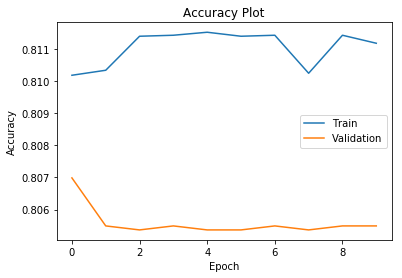

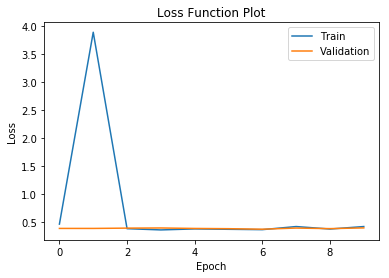

In [36]:
## Plot:
print(mlp_model_history.history.keys())

## Accuracy:
plt.plot(mlp_model_history.history['accuracy'])
plt.plot(mlp_model_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Loss:
plt.plot(mlp_model_history.history['loss'])
plt.plot(mlp_model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [37]:
# Get Model Summary:
print(mlp_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                440       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


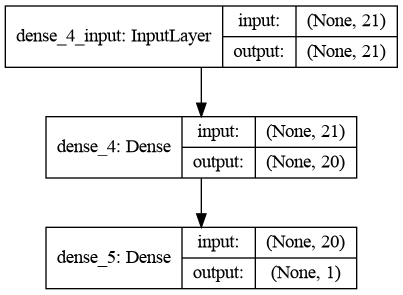

In [38]:
# Vizualize the model:
from keras.utils.vis_utils import plot_model

plot_model(mlp_model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'

#### Predictions

#### Getting evaluation metrics and evaluating model performance

In [39]:
mlp_test_pred = mlp_model.predict_classes(X_test)
mlp_train_pred = mlp_model.predict_classes(X_train)

mlp_confusion_matrix_test = confusion_matrix(y_test, mlp_test_pred)
mlp_confusion_matrix_train = confusion_matrix(y_train, mlp_train_pred)

print(mlp_confusion_matrix_train)
print(mlp_confusion_matrix_test)


[[32468     1]
 [ 7602     2]]
[[13916     0]
 [ 3259     0]]


#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [40]:
##### Train Test Accuracy, True Negative Rate and True Positive Rate

mlp_Accuracy_Train=(mlp_confusion_matrix_train[0,0]+mlp_confusion_matrix_train[1,1])/(mlp_confusion_matrix_train[0,0]+mlp_confusion_matrix_train[0,1]+mlp_confusion_matrix_train[1,0]+mlp_confusion_matrix_train[1,1])
mlp_TNR_Train=mlp_confusion_matrix_train[0,0]/(mlp_confusion_matrix_train[0,0]+mlp_confusion_matrix_train[0,1])
mlp_TPR_Train=mlp_confusion_matrix_train[1,1]/(mlp_confusion_matrix_train[1,0]+mlp_confusion_matrix_train[1,1])

print("Train TNR: ",mlp_TNR_Train)
print("Train TPR: ",mlp_TPR_Train)
print("Train Accuracy: ",mlp_Accuracy_Train)

print("-----------------------")

mlp_Accuracy_Test=(mlp_confusion_matrix_test[0,0]+mlp_confusion_matrix_test[1,1])/(mlp_confusion_matrix_test[0,0]+mlp_confusion_matrix_test[0,1]+mlp_confusion_matrix_test[1,0]+mlp_confusion_matrix_test[1,1])
mlp_TNR_Test= mlp_confusion_matrix_test[0,0]/(mlp_confusion_matrix_test[0,0] + mlp_confusion_matrix_test[0,1])
mlp_TPR_Test= mlp_confusion_matrix_test[1,1]/(mlp_confusion_matrix_test[1,0] + mlp_confusion_matrix_test[1,1])

print("Test TNR: ",mlp_TNR_Test)
print("Test TPR: ",mlp_TPR_Test)
print("Test Accuracy: ",mlp_Accuracy_Test)

Train TNR:  0.9999692013920971
Train TPR:  0.0002630194634402946
Train Accuracy:  0.8102712549596985
-----------------------
Test TNR:  1.0
Test TPR:  0.0
Test Accuracy:  0.8102474526928676


### MLP with 2 layers

    1 hidden layer with 25 neurons

In [41]:
mlp25 = Sequential()

mlp25.add(Dense(25, input_dim=21, activation='sigmoid', kernel_initializer=initializers.RandomUniform(seed=351)))
mlp25.add(Dense(1, activation='sigmoid'))
mlp25.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [42]:
mlp25_hist = mlp25.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2,
                      use_multiprocessing=True, shuffle=True)

Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 25us/step - loss: 0.3544 - accuracy: 0.8331 - val_loss: 0.3157 - val_accuracy: 0.8586
Epoch 2/10
32058/32058 [==============================] - 1s 23us/step - loss: 0.2985 - accuracy: 0.8683 - val_loss: 0.2921 - val_accuracy: 0.8791
Epoch 3/10
32058/32058 [==============================] - 1s 22us/step - loss: 0.2847 - accuracy: 0.8775 - val_loss: 0.2913 - val_accuracy: 0.8751
Epoch 4/10
32058/32058 [==============================] - 1s 22us/step - loss: 0.2797 - accuracy: 0.8826 - val_loss: 0.2765 - val_accuracy: 0.8896
Epoch 5/10
32058/32058 [==============================] - 1s 22us/step - loss: 0.2777 - accuracy: 0.8841 - val_loss: 0.2850 - val_accuracy: 0.8837
Epoch 6/10
32058/32058 [==============================] - 1s 22us/step - loss: 0.2778 - accuracy: 0.8851 - val_loss: 0.2883 - val_accuracy: 0.8705
Epoch 7/10
32058/32058 [==============================] - 1s 22us/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


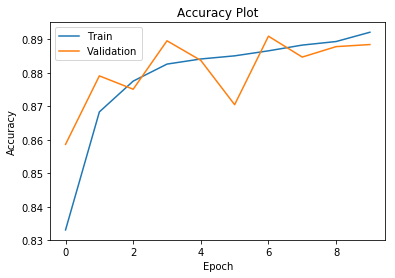

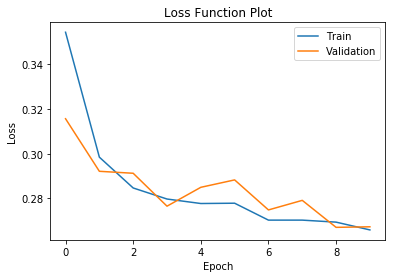

In [43]:
## Plot:

print(mlp25_hist.history.keys())

## Accuracy:

plt.plot(mlp25_hist.history['accuracy'])
plt.plot(mlp25_hist.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

## Loss:

plt.plot(mlp25_hist.history['loss'])
plt.plot(mlp25_hist.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [44]:
mlp25.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 25)                550       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________


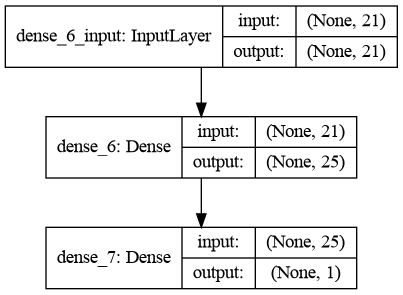

In [45]:
plot_model(mlp25, to_file="MLP_25_Neuron.png", show_layer_names=True, show_shapes=True)

#### Predictions

#### Getting evaluation metrics and evaluating model performance

In [46]:
mlp25_test_pred = mlp25.predict_classes(X_test)
mlp25_train_pred = mlp25.predict_classes(X_train)

mlp25_confusion_matrix_test = confusion_matrix(y_test, mlp25_test_pred)
mlp25_confusion_matrix_train = confusion_matrix(y_train, mlp25_train_pred)

print("Confusion Matrix for Train Data:")
print(mlp25_confusion_matrix_train)
print("Confusion Matrix for Test Data:")
print(mlp25_confusion_matrix_test)


Confusion Matrix for Train Data:
[[30825  1644]
 [ 2771  4833]]
Confusion Matrix for Test Data:
[[13242   674]
 [ 1194  2065]]


#### Calculate Accuracy, True Positive Rate and True Negative Rates

Observation:

    Based on the TPR, 2 layer MLP with 25 nodes hidden layer is best

In [47]:
##### Train Test Accuracy, True Negative Rate and True Positive Rate

mlp25_Accuracy_Train = (mlp25_confusion_matrix_train[0,0]+
                        mlp25_confusion_matrix_train[1,1])/(
                        mlp25_confusion_matrix_train[0,0]+
                        mlp25_confusion_matrix_train[0,1]+
                        mlp25_confusion_matrix_train[1,0]+
                        mlp25_confusion_matrix_train[1,1])
    
mlp25_TNR_Train = mlp25_confusion_matrix_train[0,0]/(
                    mlp25_confusion_matrix_train[0,0]+
                    mlp25_confusion_matrix_train[0,1])

mlp25_TPR_Train = mlp25_confusion_matrix_train[1,1]/(
                    mlp25_confusion_matrix_train[1,0]+
                    mlp25_confusion_matrix_train[1,1])

print("Train TNR: ",mlp25_TNR_Train)
print("Train TPR: ",mlp25_TPR_Train)
print("Train Accuracy: ",mlp25_Accuracy_Train)

print("-----------------------")

mlp25_Accuracy_Test = (mlp25_confusion_matrix_test[0,0]+
                        mlp25_confusion_matrix_test[1,1])/(
                        mlp25_confusion_matrix_test[0,0]+
                        mlp25_confusion_matrix_test[0,1]+
                        mlp25_confusion_matrix_test[1,0]+
                        mlp25_confusion_matrix_test[1,1])
    
mlp25_TNR_Test = mlp25_confusion_matrix_test[0,0]/(
                    mlp25_confusion_matrix_test[0,0]+
                    mlp25_confusion_matrix_test[0,1])

mlp25_TPR_Test = mlp25_confusion_matrix_test[1,1]/(
                    mlp25_confusion_matrix_test[1,0]+
                    mlp25_confusion_matrix_test[1,1])

print("Test TNR: ",mlp25_TNR_Test)
print("Test TPR: ",mlp25_TPR_Test)
print("Test Accuracy: ",mlp25_Accuracy_Test)


Train TNR:  0.9493670886075949
Train TPR:  0.6355865334034718
Train Accuracy:  0.8898260674269458
-----------------------
Test TNR:  0.9515665421098016
Test TPR:  0.6336299478367597
Test Accuracy:  0.8912372634643377


### MLP with 3 layers

    1st hidden layer with 25 neurons
    2nd hidden layer with 15 neurons

In [48]:
## MLP with 3 layers: 25 & 15 neurons:

# Define MLP model:

from keras import initializers
from keras.layers.advanced_activations import LeakyReLU

mlp_model_3 = Sequential()
mlp_model_3.add(Dense(25, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=351)))
mlp_model_3.add(Dense(15))
mlp_model_3.add(LeakyReLU(alpha=0.09))
mlp_model_3.add(Dense(1, activation='sigmoid'))
mlp_model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


mlp_model_3_history = mlp_model_3.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, use_multiprocessing=True)


Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 30us/step - loss: 1.5740 - accuracy: 0.8286 - val_loss: 0.9273 - val_accuracy: 0.8432
Epoch 2/10
32058/32058 [==============================] - 1s 25us/step - loss: 0.6344 - accuracy: 0.8639 - val_loss: 0.3866 - val_accuracy: 0.8818
Epoch 3/10
32058/32058 [==============================] - 1s 25us/step - loss: 0.5644 - accuracy: 0.8735 - val_loss: 0.5795 - val_accuracy: 0.8802
Epoch 4/10
32058/32058 [==============================] - 1s 25us/step - loss: 0.7105 - accuracy: 0.8692 - val_loss: 0.9374 - val_accuracy: 0.8564
Epoch 5/10
32058/32058 [==============================] - 1s 27us/step - loss: 0.4884 - accuracy: 0.8728 - val_loss: 0.9982 - val_accuracy: 0.8791
Epoch 6/10
32058/32058 [==============================] - 1s 26us/step - loss: 0.4278 - accuracy: 0.8770 - val_loss: 0.3677 - val_accuracy: 0.8806
Epoch 7/10
32058/32058 [==============================] - 1s 27us/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


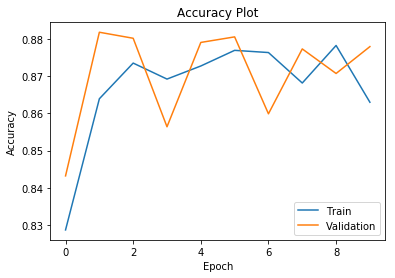

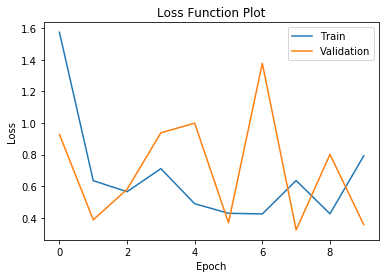

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 25)                550       
_________________________________________________________________
dense_9 (Dense)              (None, 15)                390       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 15)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 16        
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________
None


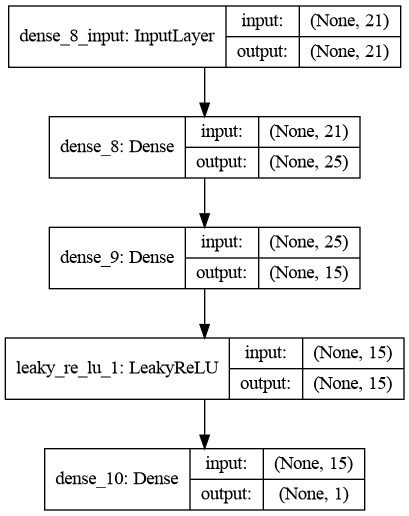

In [49]:
## Plot:
print(mlp_model_3_history.history.keys())

## Accuracy:
plt.plot(mlp_model_3_history.history['accuracy'])
plt.plot(mlp_model_3_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Loss:
plt.plot(mlp_model_3_history.history['loss'])
plt.plot(mlp_model_3_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Get Model Summary:
print(mlp_model_3.summary())

# Vizualize the model:
from keras.utils.vis_utils import plot_model

plot_model(mlp_model_3, to_file='mlp_model_3.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'


#### Predictions

#### Getting evaluation metrics and evaluating model performance

#### Calculate Accuracy, True Positive Rate and True Negative Rates

Observation:

    Based on the TPR: 3 layer mlp, with 25 nodes in hidden layer 1 and 15 nodes in hidden layer 2 is the best 

In [50]:
#### Predictions

#### Getting evaluation metrics and evaluating model performance

mlp_test_pred_3 = mlp_model_3.predict_classes(X_test)
mlp_train_pred_3 = mlp_model_3.predict_classes(X_train)

mlp_confusion_matrix_test_3 = confusion_matrix(y_test, mlp_test_pred_3)
mlp_confusion_matrix_train_3 = confusion_matrix(y_train, mlp_train_pred_3)

print(mlp_confusion_matrix_train_3)
print(mlp_confusion_matrix_test_3)


#### Calculate Accuracy, True Positive Rate and True Negative Rates

##### Train Test Accuracy, True Negative Rate and True Positive Rate

mlp_Accuracy_Train_3=(mlp_confusion_matrix_train_3[0,0]+mlp_confusion_matrix_train_3[1,1])/(mlp_confusion_matrix_train_3[0,0]+mlp_confusion_matrix_train_3[0,1]+mlp_confusion_matrix_train_3[1,0]+mlp_confusion_matrix_train_3[1,1])
mlp_TNR_Train_3=mlp_confusion_matrix_train_3[0,0]/(mlp_confusion_matrix_train_3[0,0]+mlp_confusion_matrix_train_3[0,1])
mlp_TPR_Train_3=mlp_confusion_matrix_train_3[1,1]/(mlp_confusion_matrix_train_3[1,0]+mlp_confusion_matrix_train_3[1,1])

print("Train TNR: ",mlp_TNR_Train_3)
print("Train TPR: ",mlp_TPR_Train_3)
print("Train Accuracy: ",mlp_Accuracy_Train_3)

print("-----------------------")

mlp_Accuracy_Test_3=(mlp_confusion_matrix_test_3[0,0]+mlp_confusion_matrix_test_3[1,1])/(mlp_confusion_matrix_test_3[0,0]+mlp_confusion_matrix_test_3[0,1]+mlp_confusion_matrix_test_3[1,0]+mlp_confusion_matrix_test_3[1,1])
mlp_TNR_Test_3= mlp_confusion_matrix_test_3[0,0]/(mlp_confusion_matrix_test_3[0,0] + mlp_confusion_matrix_test_3[0,1])
mlp_TPR_Test_3= mlp_confusion_matrix_test_3[1,1]/(mlp_confusion_matrix_test_3[1,0] + mlp_confusion_matrix_test_3[1,1])

print("Test TNR: ",mlp_TNR_Test_3)
print("Test TPR: ",mlp_TPR_Test_3)
print("Test Accuracy: ",mlp_Accuracy_Test_3)

[[30428  2041]
 [ 2866  4738]]
[[13068   848]
 [ 1207  2052]]
Train TNR:  0.9371400412701346
Train TPR:  0.6230931088900579
Train Accuracy:  0.8775484740348863
-----------------------
Test TNR:  0.9390629491233113
Test TPR:  0.6296409941699908
Test Accuracy:  0.880349344978166


### MLP with 3 layers

    1st hidden layer with 25 neurons
    2nd hidden layer with 20 neurons

In [51]:
## MLP with 3 layers: 25 & 20 neurons:

# Define MLP model:

from keras import initializers
from keras.layers.advanced_activations import LeakyReLU

mlp_model_25_20 = Sequential()
mlp_model_25_20.add(Dense(25, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=351)))
mlp_model_25_20.add(Dense(20))
mlp_model_25_20.add(LeakyReLU(alpha=0.09))
mlp_model_25_20.add(Dense(1, activation='sigmoid'))
mlp_model_25_20.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


mlp_model_25_20_history = mlp_model_25_20.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, use_multiprocessing=True)


Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 40us/step - loss: 0.5041 - accuracy: 0.8540 - val_loss: 0.3993 - val_accuracy: 0.8755
Epoch 2/10
32058/32058 [==============================] - 1s 33us/step - loss: 0.5029 - accuracy: 0.8642 - val_loss: 0.6029 - val_accuracy: 0.8625
Epoch 3/10
32058/32058 [==============================] - 1s 33us/step - loss: 0.4593 - accuracy: 0.8693 - val_loss: 0.3816 - val_accuracy: 0.8818
Epoch 4/10
32058/32058 [==============================] - 1s 32us/step - loss: 0.4076 - accuracy: 0.8696 - val_loss: 0.3120 - val_accuracy: 0.8911
Epoch 5/10
32058/32058 [==============================] - 1s 33us/step - loss: 0.3353 - accuracy: 0.8767 - val_loss: 0.3687 - val_accuracy: 0.8866
Epoch 6/10
32058/32058 [==============================] - 1s 27us/step - loss: 0.4282 - accuracy: 0.8838 - val_loss: 0.3276 - val_accuracy: 0.8913
Epoch 7/10
32058/32058 [==============================] - 1s 26us/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


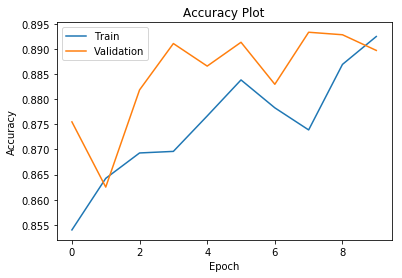

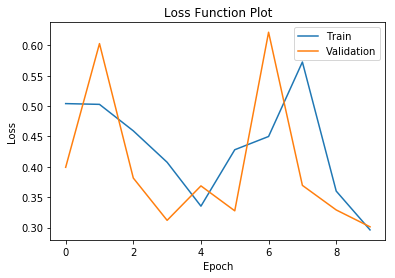

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 25)                550       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                520       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________
None


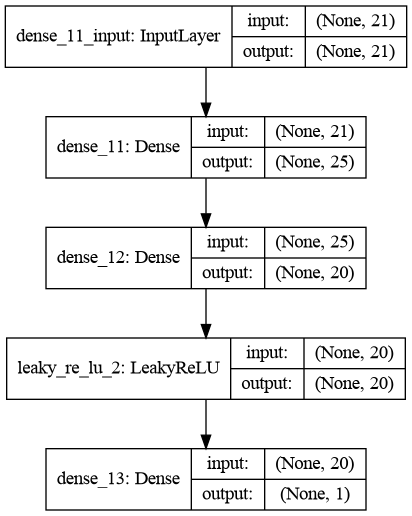

In [52]:
## Plot:
print(mlp_model_25_20_history.history.keys())

## Accuracy:
plt.plot(mlp_model_25_20_history.history['accuracy'])
plt.plot(mlp_model_25_20_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Loss:
plt.plot(mlp_model_25_20_history.history['loss'])
plt.plot(mlp_model_25_20_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Get Model Summary:
print(mlp_model_25_20.summary())

# Vizualize the model:
from keras.utils.vis_utils import plot_model

plot_model(mlp_model_25_20, to_file='mlp_model_20_25.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'


#### Predictions

#### Getting evaluation metrics and evaluating model performance

#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [53]:
#### Predictions

#### Getting evaluation metrics and evaluating model performance

mlp_test_pred_25_20 = mlp_model_25_20.predict_classes(X_test)
mlp_train_pred_25_20 = mlp_model_25_20.predict_classes(X_train)

mlp_confusion_matrix_test_25_20 = confusion_matrix(y_test, mlp_test_pred_25_20)
mlp_confusion_matrix_train_25_20 = confusion_matrix(y_train, mlp_train_pred_25_20)

print(mlp_confusion_matrix_train_25_20)
print(mlp_confusion_matrix_test_25_20)


#### Calculate Accuracy, True Positive Rate and True Negative Rates

##### Train Test Accuracy, True Negative Rate and True Positive Rate

mlp_Accuracy_Train_25_20=(mlp_confusion_matrix_train_25_20[0,0]+mlp_confusion_matrix_train_25_20[1,1])/(mlp_confusion_matrix_train_25_20[0,0]+mlp_confusion_matrix_train_25_20[0,1]+mlp_confusion_matrix_train_25_20[1,0]+mlp_confusion_matrix_train_25_20[1,1])
mlp_TNR_Train_25_20=mlp_confusion_matrix_train_25_20[0,0]/(mlp_confusion_matrix_train_25_20[0,0]+mlp_confusion_matrix_train_25_20[0,1])
mlp_TPR_Train_25_20=mlp_confusion_matrix_train_25_20[1,1]/(mlp_confusion_matrix_train_25_20[1,0]+mlp_confusion_matrix_train_25_20[1,1])

print("Train TNR: ",mlp_TNR_Train_25_20)
print("Train TPR: ",mlp_TPR_Train_25_20)
print("Train Accuracy: ",mlp_Accuracy_Train_25_20)

print("-----------------------")

mlp_Accuracy_Test_25_20=(mlp_confusion_matrix_test_25_20[0,0]+mlp_confusion_matrix_test_25_20[1,1])/(mlp_confusion_matrix_test_25_20[0,0]+mlp_confusion_matrix_test_25_20[0,1]+mlp_confusion_matrix_test_25_20[1,0]+mlp_confusion_matrix_test_25_20[1,1])
mlp_TNR_Test_25_20= mlp_confusion_matrix_test_25_20[0,0]/(mlp_confusion_matrix_test_25_20[0,0] + mlp_confusion_matrix_test_25_20[0,1])
mlp_TPR_Test_25_20= mlp_confusion_matrix_test_25_20[1,1]/(mlp_confusion_matrix_test_25_20[1,0] + mlp_confusion_matrix_test_25_20[1,1])

print("Test TNR: ",mlp_TNR_Test_25_20)
print("Test TPR: ",mlp_TPR_Test_25_20)
print("Test Accuracy: ",mlp_Accuracy_Test_25_20)

[[30983  1486]
 [ 2901  4703]]
[[13323   593]
 [ 1235  2024]]
Train TNR:  0.9542332686562567
Train TPR:  0.6184902682798528
Train Accuracy:  0.8905247922541362
-----------------------
Test TNR:  0.9573871802242023
Test TPR:  0.62104940165695
Test Accuracy:  0.893566229985444


In [54]:
#np.logspace(0.0001,1,8, base=0.5)
#np.logspace(-3,-1,8)
#np.exp(-3)
tpr=[TPR_Test,mlp_TPR_Test_15,mlp_TPR_Test,
     mlp25_TPR_Test,mlp_TPR_Test_3, mlp_TPR_Test_25_20]
print(tpr)
print()

tnr=[TNR_Test,mlp_TNR_Test_15,mlp_TNR_Test,
     mlp25_TNR_Test,mlp_TNR_Test_3, mlp_TNR_Test_25_20]
print(tnr)
print()

models_l = ['Perceptron','MLP_15_neurons','MLP_20_neurons',
            'MLP_25_neurons','MLP_25_15_neurons','MLP_25_20_neurons']

accuracy=[Accuracy_Test, mlp_Accuracy_Test_15,
         mlp_Accuracy_Test, mlp25_Accuracy_Test,
         mlp_Accuracy_Test_3, mlp_Accuracy_Test_25_20]
print(accuracy)


[0.6710647437864375, 0.7094200675053698, 0.0, 0.6336299478367597, 0.6296409941699908, 0.62104940165695]

[0.8942943374532911, 0.9221040528887612, 1.0, 0.9515665421098016, 0.9390629491233113, 0.9573871802242023]

[0.8519359534206695, 0.8817467248908297, 0.8102474526928676, 0.8912372634643377, 0.880349344978166, 0.893566229985444]


In [55]:
best_model = pd.DataFrame(list(zip(models_l, accuracy, tpr, tnr)), 
             columns=(['Model_type','Accuracy','TPR','TNR']))


In [56]:
best_model

,Model_type,Accuracy,TPR,TNR
0,Perceptron,0.851936,0.671065,0.894294
1,MLP_15_neurons,0.881747,0.709420,0.922104
2,MLP_20_neurons,0.810247,0.000000,1.000000
3,MLP_25_neurons,0.891237,0.633630,0.951567
4,MLP_25_15_neurons,0.880349,0.629641,0.939063
5,MLP_25_20_neurons,0.893566,0.621049,0.957387


In [57]:
best_tpr_v = best_model.sort_values('TPR',ascending=False).reset_index().drop('index',axis=1).iloc[0][0]

In [58]:
best_tpr_v

'MLP_15_neurons'

In [59]:
print("Observation:")
print("Based on the TPR, following model is the best: "+best_tpr_v)


Observation:
Based on the TPR, following model is the best: MLP_15_neurons


## Find best parameter

### Find the best Learning rate

    Using logarithmic scale randomly generate values between 0.0001 to 1 

In [60]:
#l_rate = np.logspace(0.0001,1,8)
#l_rate = 10**(-2.3 * np.random.rand(6))
l_rate = np.logspace(-3,-1,8)
l_rate


array([0.001     , 0.0019307 , 0.00372759, 0.00719686, 0.01389495,
       0.02682696, 0.05179475, 0.1       ])

In [61]:
from keras.optimizers import Adam, SGD
from sklearn.model_selection import GridSearchCV

In [62]:
def tune_l_rate(l_rate=0.01):
    
    # Create a model:
    ['Perceptron','MLP_15_neurons','MLP_20_neurons',
            'MLP_25_neurons','MLP_25_15_neurons','MLP_25_20_neurons']
    
    if best_tpr_v=='Perceptron':
        tuned_model = Sequential()
        tuned_model.add(Dense(1, input_dim=21, activation='sigmoid', kernel_initializer='normal'))
        optimizer = SGD(lr=l_rate)
    
    elif best_tpr_v=='MLP_15_neurons':
        tuned_model = Sequential()
        tuned_model.add(Dense(15, input_dim=21, activation='tanh', kernel_initializer=initializers.RandomUniform(seed=123)))
        tuned_model.add(Dense(1, activation='sigmoid'))
        optimizer = SGD(lr=l_rate)

    elif best_tpr_v=='MLP_20_neurons':
        tuned_model = Sequential()
        tuned_model.add(Dense(20, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=123)))
        tuned_model.add(Dense(1, activation='sigmoid'))
        optimizer = SGD(lr=l_rate)
        
    elif best_tpr_v=='MLP_25_neurons':
        tuned_model = Sequential()
        tuned_model.add(Dense(25, input_dim=21, activation='sigmoid', kernel_initializer=initializers.RandomUniform(seed=351)))
        tuned_model.add(Dense(1, activation='sigmoid'))
        optimizer = SGD(lr=l_rate)
        
    elif best_tpr_v=='MLP_25_15_neurons':
        tuned_model = Sequential()
        tuned_model.add(Dense(25, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=351)))
        tuned_model.add(Dense(15))
        tuned_model.add(LeakyReLU(alpha=0.09))
        tuned_model.add(Dense(1, activation='sigmoid'))
        optimizer = Adam(lr=l_rate)

    elif best_tpr_v=='MLP_25_20_neurons':
        tuned_model = Sequential()
        tuned_model.add(Dense(25, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=351)))
        tuned_model.add(Dense(20))
        tuned_model.add(LeakyReLU(alpha=0.09))
        tuned_model.add(Dense(1, activation='sigmoid'))
        optimizer = Adam(lr=l_rate)
    
    # Compile Model:
    tuned_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return tuned_model


In [63]:
hist_loss=[]
hist_acc=[]

for l_rate_v in l_rate:
    
    tuned_model = tune_l_rate(l_rate_v)
    
    #Fit the model
    tuned_model_history = tuned_model.fit(X_train, y_train, epochs=1,
                                       batch_size=64, validation_split=0.2,
                                       use_multiprocessing=True)

    
    hist_loss.append(tuned_model_history.history['val_loss'])
    hist_acc.append(tuned_model_history.history['val_accuracy'])

Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 25us/step - loss: 0.3355 - accuracy: 0.8545 - val_loss: 0.2934 - val_accuracy: 0.8803
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 26us/step - loss: 0.3288 - accuracy: 0.8490 - val_loss: 0.2946 - val_accuracy: 0.8711
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 24us/step - loss: 0.3270 - accuracy: 0.8533 - val_loss: 0.2972 - val_accuracy: 0.8740
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 25us/step - loss: 0.3170 - accuracy: 0.8534 - val_loss: 0.2850 - val_accuracy: 0.8857
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 36us/step - loss: 0.3235 - accuracy: 0.8412 - val_loss: 0.2939 - val_accuracy: 0.8816
Train on 32058 samples, v

In [64]:
# Get the Learning rate and loss Dataframe
loss_l_rate = pd.DataFrame([l_rate, hist_loss, hist_acc]).T  

#Give the coloumn names
loss_l_rate.columns=['l_rate','val_loss','val_accuracy']

#Sort the values and reset the index
loss_l_rate=loss_l_rate.sort_values('val_loss').reset_index().drop('index',axis=1)
loss_l_rate

,l_rate,val_loss,val_accuracy
0,0.00719686,[0.28501631983428616],[0.8857142925262451]
1,0.001,[0.2934058461089619],[0.880349338054657]
2,0.013895,[0.2938799406354753],[0.8815969824790955]
3,0.0019307,[0.2946369007871215],[0.8711166381835938]
4,0.00372759,[0.2972489592959118],[0.8739863038063049]
5,0.0517947,[0.30451935108795214],[0.865252673625946]
6,0.026827,[0.3346531877834501],[0.8187149167060852]
7,0.1,[0.43365191380195295],[0.8061135411262512]


In [65]:
best_l_rate=loss_l_rate.iloc[0][0]

In [66]:
best_l_rate

0.0071968567300115215

#### Build model with the best learning rate

In [67]:
import tensorflow as tf

In [68]:
# np.random.seed(123)
# tf.random.set_seed(123)

In [69]:
# Building Best Model with Best Learning Rate:
# The function will give Compiled Model:

l_tuned_model = tune_l_rate(best_l_rate)

In [70]:
l_tuned_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 15)                330       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 16        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [71]:
l_tuned_model_history = l_tuned_model.fit(X_train, y_train, epochs=100,
                                       batch_size=64, validation_split=0.2,
                                       use_multiprocessing=True)

Train on 32058 samples, validate on 8015 samples
Epoch 1/100
32058/32058 [==============================] - 1s 26us/step - loss: 0.3268 - accuracy: 0.8501 - val_loss: 0.3150 - val_accuracy: 0.8502
Epoch 2/100
32058/32058 [==============================] - 1s 20us/step - loss: 0.2889 - accuracy: 0.8766 - val_loss: 0.2743 - val_accuracy: 0.8873
Epoch 3/100
32058/32058 [==============================] - 1s 20us/step - loss: 0.2979 - accuracy: 0.8700 - val_loss: 0.2902 - val_accuracy: 0.8877
Epoch 4/100
32058/32058 [==============================] - 1s 21us/step - loss: 0.2922 - accuracy: 0.8692 - val_loss: 0.2885 - val_accuracy: 0.8836
Epoch 5/100
32058/32058 [==============================] - 1s 21us/step - loss: 0.2970 - accuracy: 0.8692 - val_loss: 0.2933 - val_accuracy: 0.8707
Epoch 6/100
32058/32058 [==============================] - 1s 21us/step - loss: 0.2850 - accuracy: 0.8725 - val_loss: 0.2994 - val_accuracy: 0.8620
Epoch 7/100
32058/32058 [==============================] - 1s 2

Epoch 56/100
32058/32058 [==============================] - 1s 21us/step - loss: 0.3290 - accuracy: 0.8219 - val_loss: 0.3166 - val_accuracy: 0.8644
Epoch 57/100
32058/32058 [==============================] - 1s 21us/step - loss: 0.3196 - accuracy: 0.8608 - val_loss: 0.3052 - val_accuracy: 0.8907
Epoch 58/100
32058/32058 [==============================] - 1s 20us/step - loss: 0.3102 - accuracy: 0.8702 - val_loss: 0.2988 - val_accuracy: 0.8873
Epoch 59/100
32058/32058 [==============================] - 1s 21us/step - loss: 0.2934 - accuracy: 0.8852 - val_loss: 0.2953 - val_accuracy: 0.8805
Epoch 60/100
32058/32058 [==============================] - 1s 20us/step - loss: 0.3071 - accuracy: 0.8619 - val_loss: 0.3029 - val_accuracy: 0.8774
Epoch 61/100
32058/32058 [==============================] - 1s 21us/step - loss: 0.3533 - accuracy: 0.8273 - val_loss: 0.3460 - val_accuracy: 0.8327
Epoch 62/100
32058/32058 [==============================] - 1s 20us/step - loss: 0.2929 - accuracy: 0.8814

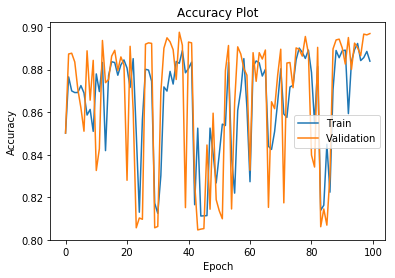

In [72]:
# Plotting Accuracy

plt.plot(l_tuned_model_history.history['accuracy'])
plt.plot(l_tuned_model_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

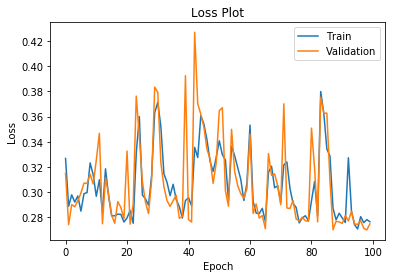

In [73]:
# Plotting Loss

plt.plot(l_tuned_model_history.history['loss'])
plt.plot(l_tuned_model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Predictions

In [74]:
train_l_tuned_model = l_tuned_model.predict_classes(X_train)
test_l_tuned_model = l_tuned_model.predict_classes(X_test)

#### Getting evaluation metrics and evaluating model performance

In [75]:
l_confusion_matrix_train = confusion_matrix(y_train, train_l_tuned_model)
l_confusion_matrix_test = confusion_matrix(y_test, test_l_tuned_model)

print(l_confusion_matrix_train)
print(l_confusion_matrix_test)

[[30868  1601]
 [ 2530  5074]]
[[13256   660]
 [ 1113  2146]]


#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [76]:
Accuracy_Train_l =(l_confusion_matrix_train[0,0]+l_confusion_matrix_train[1,1])/(l_confusion_matrix_train[0,0]+l_confusion_matrix_train[0,1]+l_confusion_matrix_train[1,0]+l_confusion_matrix_train[1,1])
TNR_Train_l = l_confusion_matrix_train[0,0]/(l_confusion_matrix_train[0,0]+l_confusion_matrix_train[0,1])
TPR_Train_l = l_confusion_matrix_train[1,1]/(l_confusion_matrix_train[1,0]+l_confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train_l)
print("Train TPR: ",TPR_Train_l)
print("Train Accuracy: ",Accuracy_Train_l)

print("-----------------------")

Accuracy_Test_l = (l_confusion_matrix_test[0,0]+l_confusion_matrix_test[1,1])/(l_confusion_matrix_test[0,0]+l_confusion_matrix_test[0,1]+l_confusion_matrix_test[1,0]+l_confusion_matrix_test[1,1])
TNR_Test_l = l_confusion_matrix_test[0,0]/(l_confusion_matrix_test[0,0] +l_confusion_matrix_test[0,1])
TPR_Test_l = l_confusion_matrix_test[1,1]/(l_confusion_matrix_test[1,0] +l_confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test_l)
print("Test TPR: ",TPR_Test_l)
print("Test Accuracy: ",Accuracy_Test_l)

print("-----------------------")


Train TNR:  0.9506914287474206
Train TPR:  0.6672803787480274
Train Accuracy:  0.8969131335313054
-----------------------
Test TNR:  0.9525725783271055
Test TPR:  0.6584841976066278
Test Accuracy:  0.8967685589519651
-----------------------


#### Find the best Batch size 

In [77]:
#l_rate = np.logspace(0.0001,1,8)
#l_rate = 10**(-2.3 * np.random.rand(6))
b_size = [32, 64, 128, 256, 500]
b_size


[32, 64, 128, 256, 500]

In [78]:
b_hist_loss=[]
b_hist_acc=[]

for b_size_v in b_size:
    
    #Fit the model
    b_l_tuned_model_history = l_tuned_model.fit(X_train, y_train, epochs=1,
                                       batch_size=b_size_v, validation_split=0.2,
                                       use_multiprocessing=True)

    b_hist_loss.append(b_l_tuned_model_history.history['val_loss'])
    b_hist_acc.append(b_l_tuned_model_history.history['val_accuracy'])

Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 39us/step - loss: 0.2968 - accuracy: 0.8700 - val_loss: 0.2801 - val_accuracy: 0.8926
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 22us/step - loss: 0.2887 - accuracy: 0.8831 - val_loss: 0.2722 - val_accuracy: 0.8946
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 0s 11us/step - loss: 0.2692 - accuracy: 0.8949 - val_loss: 0.2702 - val_accuracy: 0.8952
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 0s 6us/step - loss: 0.2694 - accuracy: 0.8923 - val_loss: 0.2705 - val_accuracy: 0.8952
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 0s 4us/step - loss: 0.2680 - accuracy: 0.8929 - val_loss: 0.2705 - val_accuracy: 0.8948


In [79]:
# Get the Learning rate and loss Dataframe
b_size_t = pd.DataFrame([b_size, b_hist_loss, b_hist_acc]).T  

#Give the coloumn names
b_size_t.columns=['b_size','val_loss','val_accuracy']

#Sort the values and reset the index
b_size_t=b_size_t.sort_values('val_loss').reset_index().drop('index',axis=1)
b_size_t

,b_size,val_loss,val_accuracy
0,128,[0.2701838998741012],[0.8951964974403381]
1,500,[0.27050521490132146],[0.8948221802711487]
2,256,[0.2705338045276111],[0.8951964974403381]
3,64,[0.2722331180136723],[0.8945726752281189]
4,32,[0.28006285797858044],[0.8925763964653015]


In [80]:
best_b_size_v=b_size_t.iloc[0][0]
best_b_size_v

128

#### Build model with the best batch size

In [81]:
b_l_tuned_model_history = l_tuned_model.fit(X_train, y_train, epochs=100,
                                       batch_size=best_b_size_v, validation_split=0.2,
                                       use_multiprocessing=True)

Train on 32058 samples, validate on 8015 samples
Epoch 1/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.2764 - accuracy: 0.8912 - val_loss: 0.2720 - val_accuracy: 0.8923
Epoch 2/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.2680 - accuracy: 0.8938 - val_loss: 0.2705 - val_accuracy: 0.8947
Epoch 3/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.2695 - accuracy: 0.8935 - val_loss: 0.2693 - val_accuracy: 0.8983
Epoch 4/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.2690 - accuracy: 0.8935 - val_loss: 0.2705 - val_accuracy: 0.8973
Epoch 5/100
32058/32058 [==============================] - 0s 12us/step - loss: 0.2703 - accuracy: 0.8937 - val_loss: 0.2700 - val_accuracy: 0.8972
Epoch 6/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.2712 - accuracy: 0.8893 - val_loss: 0.2701 - val_accuracy: 0.8957
Epoch 7/100
32058/32058 [==============================] - 0s 1

Epoch 56/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.3258 - accuracy: 0.8575 - val_loss: 0.2779 - val_accuracy: 0.8953
Epoch 57/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.2906 - accuracy: 0.8755 - val_loss: 0.3416 - val_accuracy: 0.8076
Epoch 58/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.3099 - accuracy: 0.8370 - val_loss: 0.2879 - val_accuracy: 0.8840
Epoch 59/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.2761 - accuracy: 0.8873 - val_loss: 0.2744 - val_accuracy: 0.8963
Epoch 60/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.2736 - accuracy: 0.8888 - val_loss: 0.2761 - val_accuracy: 0.8902
Epoch 61/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.2709 - accuracy: 0.8938 - val_loss: 0.2719 - val_accuracy: 0.8947
Epoch 62/100
32058/32058 [==============================] - 0s 11us/step - loss: 0.2697 - accuracy: 0.8938

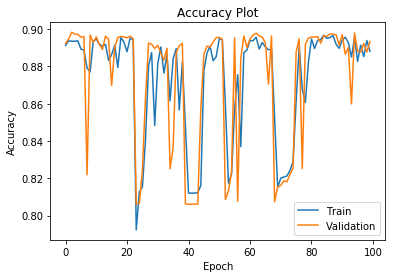

In [82]:
# Plotting Accuracy

plt.plot(b_l_tuned_model_history.history['accuracy'])
plt.plot(b_l_tuned_model_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

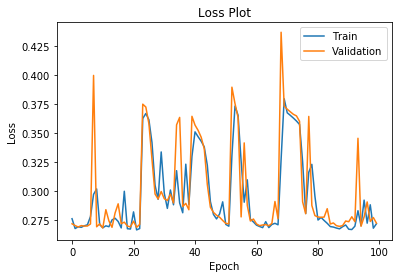

In [83]:
# Plotting Loss

plt.plot(b_l_tuned_model_history.history['loss'])
plt.plot(b_l_tuned_model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Predictions

In [84]:
train_b_l_tuned_model = l_tuned_model.predict_classes(X_train)
test_b_l_tuned_model = l_tuned_model.predict_classes(X_test)

#### Getting evaluation metrics and evaluating model performance

In [85]:
b_l_confusion_matrix_train = confusion_matrix(y_train, train_b_l_tuned_model)
b_l_confusion_matrix_test = confusion_matrix(y_test, test_b_l_tuned_model)

print(b_l_confusion_matrix_train)
print(b_l_confusion_matrix_test)

[[30000  2469]
 [ 1862  5742]]
[[12874  1042]
 [  820  2439]]


#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [86]:
Accuracy_Train_l_b =(b_l_confusion_matrix_train[0,0]+b_l_confusion_matrix_train[1,1])/(b_l_confusion_matrix_train[0,0]+b_l_confusion_matrix_train[0,1]+b_l_confusion_matrix_train[1,0]+b_l_confusion_matrix_train[1,1])
TNR_Train_l_b = b_l_confusion_matrix_train[0,0]/(b_l_confusion_matrix_train[0,0]+b_l_confusion_matrix_train[0,1])
TNR_Train_l_b = b_l_confusion_matrix_train[1,1]/(b_l_confusion_matrix_train[1,0]+b_l_confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train_l_b)
print("Train TPR: ",TNR_Train_l_b)
print("Train Accuracy: ",Accuracy_Train_l_b)

print("-----------------------")

Accuracy_Test_l_b = (b_l_confusion_matrix_test[0,0]+b_l_confusion_matrix_test[1,1])/(b_l_confusion_matrix_test[0,0]+b_l_confusion_matrix_test[0,1]+b_l_confusion_matrix_test[1,0]+b_l_confusion_matrix_test[1,1])
TNR_Test_l_b = b_l_confusion_matrix_test[0,0]/(b_l_confusion_matrix_test[0,0] +b_l_confusion_matrix_test[0,1])
TPR_Test_l_b = b_l_confusion_matrix_test[1,1]/(b_l_confusion_matrix_test[1,0] +b_l_confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test_l_b)
print("Test TPR: ",TPR_Test_l_b)
print("Test Accuracy: ",Accuracy_Test_l_b)

print("-----------------------")


Train TNR:  0.7551288795370857
Train TPR:  0.7551288795370857
Train Accuracy:  0.891922241908517
-----------------------
Test TNR:  0.9251221615406726
Test TPR:  0.7483890764038048
Test Accuracy:  0.8915866084425036
-----------------------


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 15)                330       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 16        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________
None


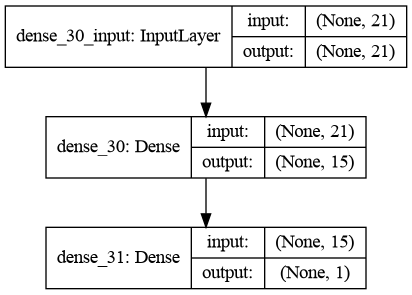

In [87]:
# Get Model Summary:
print(l_tuned_model.summary())

# Vizualize the model:
plot_model(l_tuned_model, to_file='l_tuned_model.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'


### Reference Links:

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

https://keras.io/